# Lab 4: Comparison of Classifiers (2%)

# Craig Phayer - 21340633

This exercise introduces the main components of the predictive data-analytics workflow. These are model training and model evaluation. You are expected to train and evaluate a few alternative classification models (i.e., classifiers) with the same dataset, and select the best among them by evaluating their performance with a few different metrics.

Please note that the focus of this exercise is NOT on understanding how the classifiers get trained. The classification algorithms used in the example notebook below are Support-Vector Machines (SVM) and Random Forest. **You are NOT expected to fully understand how they work.** For this exercise, it is sufficient to understand that a classification algorithm takes a training data set as an input and somehow trains a model that can be used to predict the value of a particular binary attribute.

The focus of this exercise is on understanding the correct workflow for training and comparing the performance of a few alternative classifiers.

## Preparation
Watch the video playlist [Exercise 4](https://www.youtube.com/playlist?list=PL92KbyraY_epKnwxVFfXApKhVxh1U59jy) (ca. 40 min).
Read the article [How and When to Use ROC Curves and Precision-Recall Curves for Classification in Python.](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

## Task 1
- Download the following files:
    - [Lab 4 - Comparison of Binary Classifiers.ipynb](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/Lab%204%20-%20Comparison%20of%20Binary%20Classifiers.ipynb) - this is the example notebook to follow in this exercise. It contains code for training and evaluating SVM and Random Forest classifiers.
    - [bcwd.csv](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/bcwd.csv) - this is the dataset used in the example notebook.
    - [seeds.csv](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/seeds.csv) - this is the dataset to work with in Tasks 2 and 3. It is taken from https://archive.ics.uci.edu/ml/datasets/seeds.

## Task 2
- Replicate the classifier training and evaluation demonstrated in the example notebook **Lab 4 - Comparison of Binary Classifiers.ipynb** but with the dataset **seeds.csv**. You will need to formulate a binary classification problem and transform the type column accordingly. That is, replace the **type** column with a binary column called **class** in which one of the original three types (it doesn't matter which one you choose) is **class 0**, and the other two types are **class 1**.

## Task 3
- Train a third probabilistic classifier (e.g., MLPClassifier, Naive Bayes, kNN) with **seeds.csv** add compare it to both SVM and Random Forest. You may encounter warnings for 0 values of some of the metrics. Ignore them and aim at having at least one classifier that has acceptable results.

In [8]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.neural_network import MLPClassifier

import warnings

warnings.simplefilter("ignore")

In [9]:
df = pd.read_csv('../Data/seeds.csv')
df.head(10)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [10]:
df.tail(10)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [11]:
df.isna().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
type                       0
dtype: int64

<Axes: ylabel='Count'>

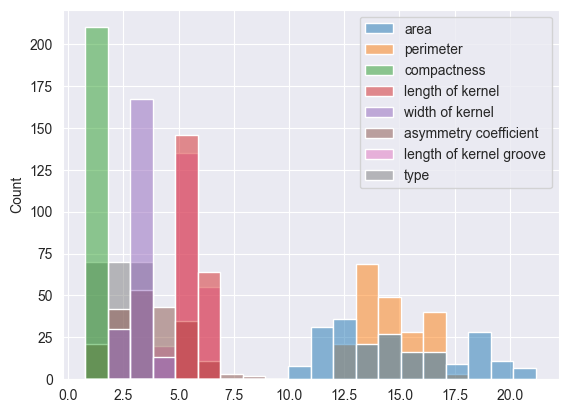

In [13]:
sns.histplot(df)

In [7]:
df['class'] = df['type'].apply(lambda x: 0 if x == 1 else 1)
df = df.drop(columns=['type'])

In [ ]:
x = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)